# Project 4:Mall Customer Segmentation using K-Means clustering

## By: Ujjwal Anand


In [100]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer


### Reading and Exploring the dataset

In [101]:
df = pd.read_csv(r"C:\Users\ujjwa\OneDrive\Desktop\Mall_Customers.csv")

In [102]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [104]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
30,31,Male,60,30,4
65,66,Male,18,48,59
145,146,Male,28,77,97
112,113,Female,38,64,42
2,3,Female,20,16,6
102,103,Male,67,62,59
190,191,Female,34,103,23
186,187,Female,54,101,24
67,68,Female,68,48,48
130,131,Male,47,71,9


### Data analysis

In [105]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [106]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [107]:
df.shape

(200, 5)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Count plot for gender

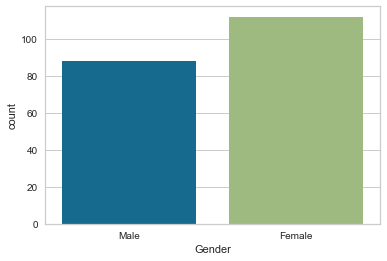

In [110]:
sns.countplot(df['Gender'])

Female    112
Male       88
Name: Gender, dtype: int64

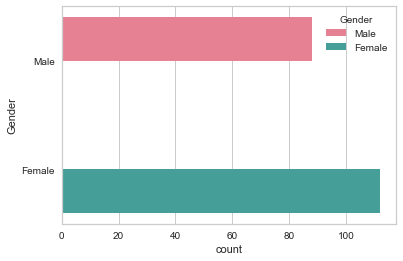

In [111]:
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

### Plotting the Relation between Age, Annual Income and Spending Score

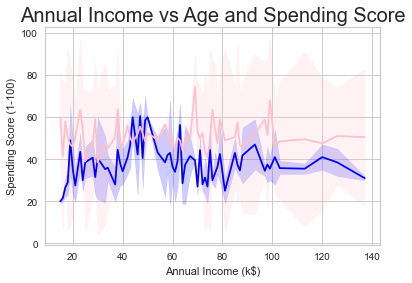

In [112]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

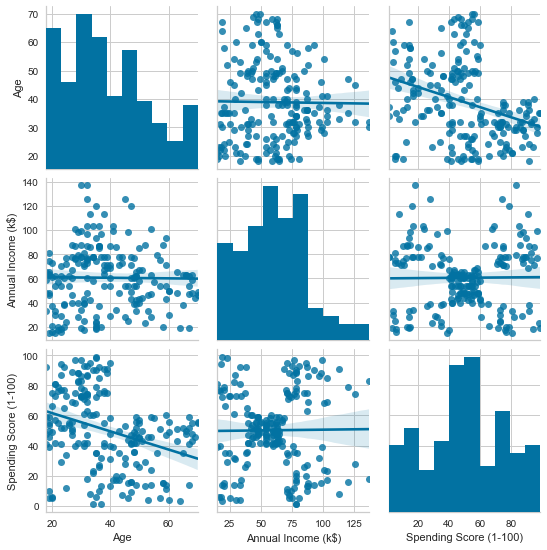

In [113]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg",
             palette="husl")

###  Distribution of values in Age, Annual Income and Spending Score according to Gender

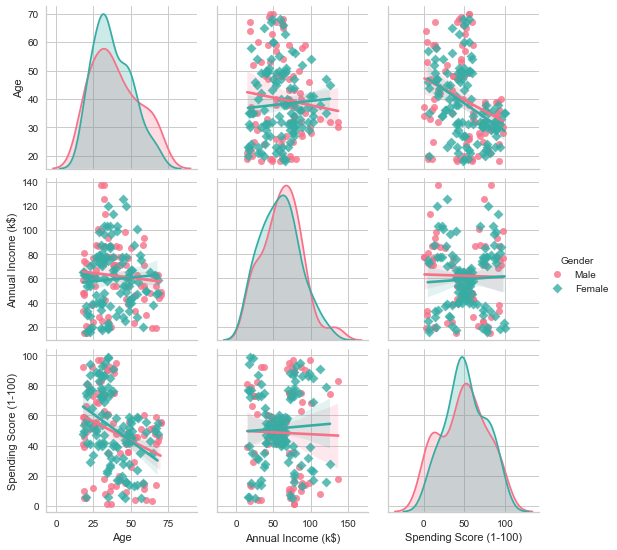

In [114]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

### Clustering using K-means: Segmentation using Age and Spending Score

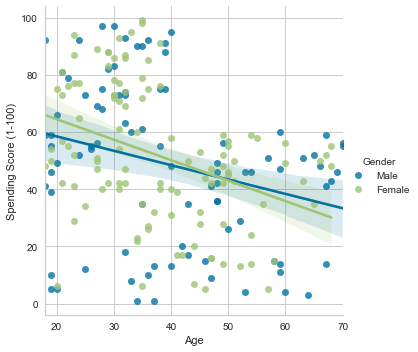

In [115]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender")

### Clustering using K-means: Segmentation using Annual Income and Spending Score

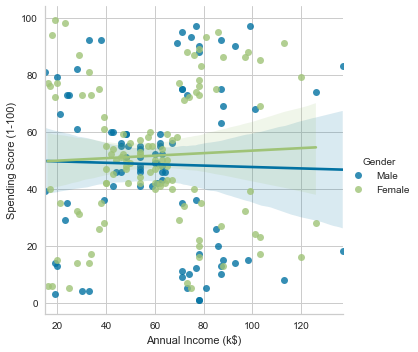

In [116]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Gender")

### Clustering using K-Means: Segmentation using Age, Annual Income and Spending Score


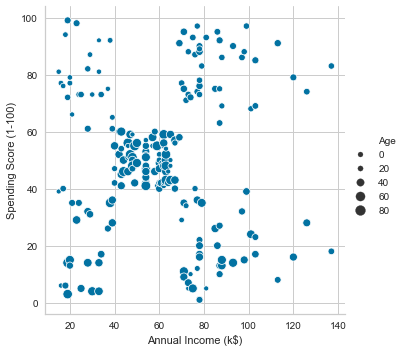

In [117]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", size="Age", data=df);

### Selection of Clusters.

In [118]:
#Creating values for the elbow
X = df.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

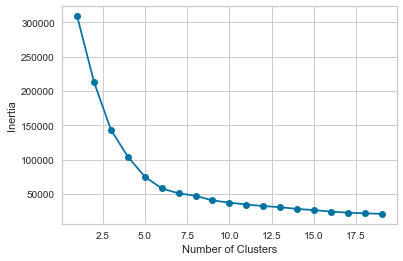

In [119]:
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Plotting the Cluster Boundary and Clusters

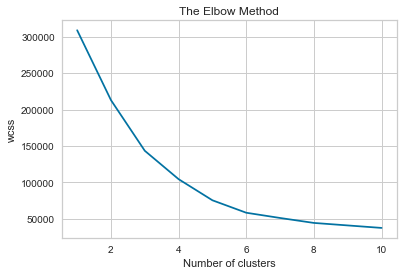

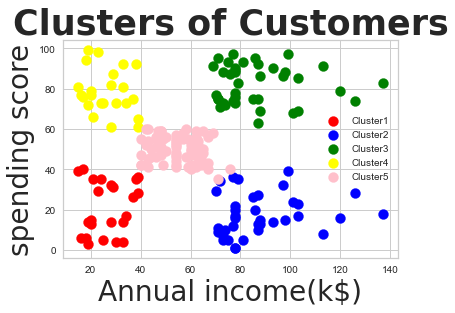

In [120]:
# GEtting the insides of the data
df.isnull().sum()

# Making  the independent variables matrix
Y = df.iloc[:, [3, 4]].values

# One Hot Encoding the categorical data - Gender
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])

#Using KMeans for clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)





#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(Y[y_kmeans == 4, 0], Y[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers', **font_title)
plt.xlabel('Annual income(k$)', **font_axes)
plt.ylabel('spending score', **font_axes)
plt.legend()
plt.show()

### 3D Plot of Clusters.

In [124]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [125]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['Spending Score (1-100)'],
    y= X['Annual Income (k$)'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)


###                                       Project done by Ujjwal Anand